In [15]:
import pandas as pd
import gensim
import time
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
with open('Data/Lemmatized/Germany_lemmatized.txt') as file:
    lines = file.readlines()

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Tokenize

In [79]:
corpus = [list(gensim.utils.tokenize(line, deacc = True)) for line in lines]

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
corpus = pd.DataFrame({'reviews': corpus})

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
docs = corpus['reviews']

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
dictionary = gensim.corpora.Dictionary(docs)

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
bow = [dictionary.doc2bow(doc) for doc in docs]

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## TF-IDF

In [84]:
from gensim.models.coherencemodel import CoherenceModel

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
tfidf = gensim.models.TfidfModel(bow)
tfidf = tfidf[bow]

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
country = "Germany"
no_iterations = 50
file_name_umass = "Data/Result/" + country + "_"+str(no_iterations) +"_result_umass.csv"
file_name_uci = "Data/Result/" + country + "_"+str(no_iterations) +"_result_uci.csv"
file_write_umass = open(file_name_umass, "a")
file_write_uci = open(file_name_uci, "a")

for no_topics in range(40,101):

    start = time.time()
    lda_model_tfidf = gensim.models.LdaModel(tfidf, 
                                             num_topics=no_topics, 
                                             id2word = dictionary, 
                                             passes = 2,
                                            iterations= no_iterations)
    end = time.time()
    print("Number of topics: " + str(no_topics))
    print("Processing time: %fs" % (end - start))
    u_mass = CoherenceModel(model=lda_model_tfidf, corpus=bow, dictionary=dictionary ,coherence='u_mass', topn=20)
    uci = CoherenceModel(model=lda_model_tfidf, texts=corpus_with_bigram, corpus=bow, dictionary=dictionary ,coherence='c_uci', topn=20)
    u_mass_res = u_mass.get_coherence() 
    uci_res = uci.get_coherence()
    file_write_umass.write(str(no_topics) + "," + str(u_mass_res) +","+str(end-start)+"\n")
    file_write_uci.write(str(no_topics) + "," + str(uci_res) +","+str(end-start)+"\n")
    print("Topics coherence: Umass: " + str(u_mass_res) + " UCI: " +str(uci_res))
    
file_write_uci.close()
file_write_umass.close()

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of topics: 40
Processing time: 32.667822s
Topics coherence: Umass: -10.949378668700916 UCI: -8.163406988719334
Number of topics: 41
Processing time: 32.707248s
Topics coherence: Umass: -12.02985484056969 UCI: -8.876260458719234
Number of topics: 42
Processing time: 33.283147s
Topics coherence: Umass: -11.618905088137712 UCI: -8.582798897905107
Number of topics: 43
Processing time: 32.751721s


/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)


Topics coherence: Umass: -10.898746033654264 UCI: inf
Number of topics: 44
Processing time: 32.641141s
Topics coherence: Umass: -11.254960912265387 UCI: -8.433544495068233
Number of topics: 45
Processing time: 34.071872s
Topics coherence: Umass: -11.291130604104318 UCI: -8.45922192019104
Number of topics: 46
Processing time: 34.852994s
Topics coherence: Umass: -11.364497596126924 UCI: inf
Number of topics: 47
Processing time: 33.865641s
Topics coherence: Umass: -10.395125886891712 UCI: inf
Number of topics: 48
Processing time: 31.586602s
Topics coherence: Umass: -10.858810943824201 UCI: -8.149611112537947
Number of topics: 49
Processing time: 37.065126s
Topics coherence: Umass: -11.433543031516303 UCI: inf
Number of topics: 50
Processing time: 35.171584s
Topics coherence: Umass: -10.572821717948097 UCI: inf
Number of topics: 51
Processing time: 35.498266s
Topics coherence: Umass: -11.408022725351584 UCI: inf
Number of topics: 52
Processing time: 31.217153s
Topics coherence: Umass: -11.

In [87]:
start = time.time()
lda_model_tfidf = gensim.models.LdaModel(tfidf, 
                                             num_topics=73, 
                                             id2word = dictionary, 
                                             passes = 2,
                                            iterations= 50)
end = time.time()
print("Number of topics: " + str(73))
print("Processing time: %fs" % (end - start))
cm = CoherenceModel(model=lda_model_tfidf, corpus=bow, dictionary=dictionary ,coherence='u_mass', topn=20)
coherence = cm.get_coherence() 
print("Topics coherence: " + str(coherence))

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of topics: 73
Processing time: 32.323368s
Topics coherence: -7.023443719624575


In [88]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.000*"againo" + 0.000*"emonorail" + 0.000*"noveau" + 0.000*"barman" + 0.000*"sytem" + 0.000*"werther" + 0.000*"restarted" + 0.000*"dingle" + 0.000*"dangle" + 0.000*"endstation"


Topic: 1 Word: 0.000*"againo" + 0.000*"emonorail" + 0.000*"noveau" + 0.000*"barman" + 0.000*"sytem" + 0.000*"werther" + 0.000*"restarted" + 0.000*"dingle" + 0.000*"dangle" + 0.000*"endstation"


Topic: 2 Word: 0.110*"park" + 0.092*"ride" + 0.025*"nearby" + 0.023*"eat" + 0.020*"expensive" + 0.018*"stuttgart" + 0.017*"love" + 0.016*"laid" + 0.015*"young" + 0.015*"feel"


Topic: 3 Word: 0.039*"friendly" + 0.025*"mine" + 0.023*"run" + 0.023*"road" + 0.020*"music" + 0.019*"staff" + 0.018*"boat" + 0.017*"mostly" + 0.016*"lovely" + 0.016*"already"


Topic: 4 Word: 0.073*"cool" + 0.060*"pay" + 0.038*"explanation" + 0.036*"sort" + 0.033*"office" + 0.024*"meal" + 0.022*"bonus" + 0.019*"using" + 0.016*"finally" + 0.016*"taken"


Topic: 5 Word: 0.000*"againo" + 0.000*"emonorail" + 0.000*"noveau" + 0.000*"b

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
pyLDAvis.gensim_models.prepare(lda_model_tfidf, tfidf, dictionary)

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=                        x                   y  topics  cluster       Freq
topic                                                                    
41    -0.468661+0.000000j  0.026711+0.000000j       1        1  24.313815
70    -0.338509+0.000000j -0.024980+0.000000j       2        1   5.296000
17    -0.340769+0.000000j -0.087413+0.000000j       3        1   4.714918
29    -0.360098+0.000000j -0.079860+0.000000j       4        1   4.672406
39    -0.301191+0.000000j  0.223410+0.000000j       5        1   3.698648
...                   ...                 ...     ...      ...        ...
15     0.097589+0.000000j -0.000501+0.000000j      69        1   0.329806
13     0.097589+0.000000j -0.000501+0.000000j      70        1   0.329806
8      0.097589+0.000000j -0.000501+0.000000j      71        1   0.329806
5      0.097589+0.000000j -0.000501+0.000000j      72        1   0.329806
36     0.097589+0.000000j -0.000501+0.000000j      73        1   0.329806

[73 ro

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


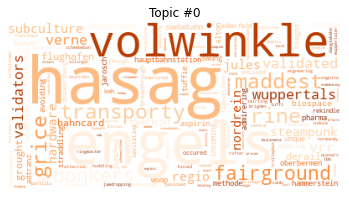

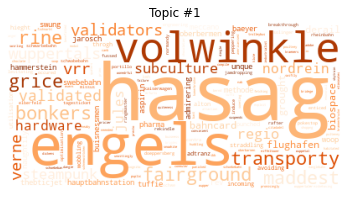

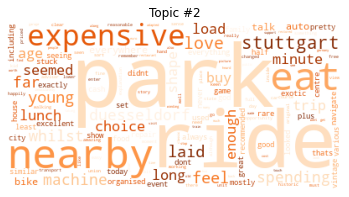

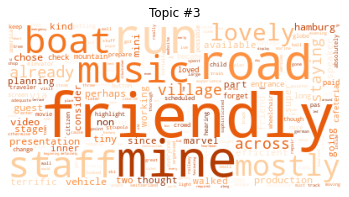

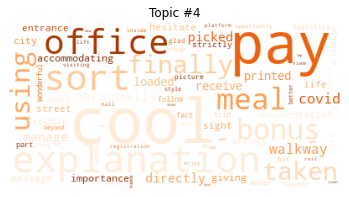

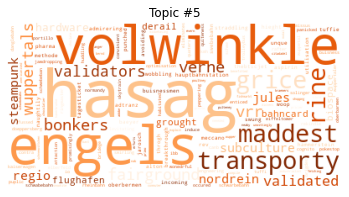

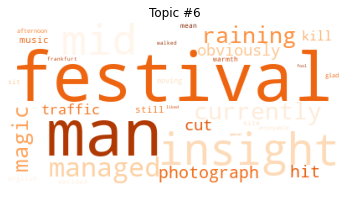

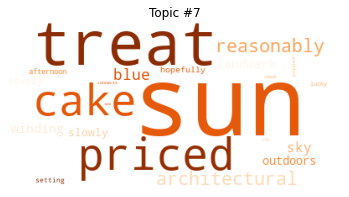

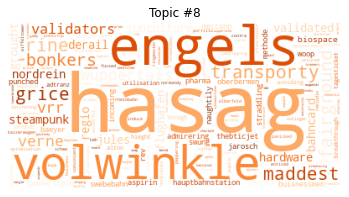

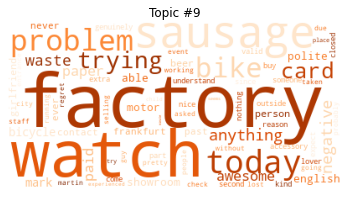

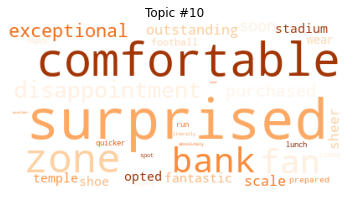

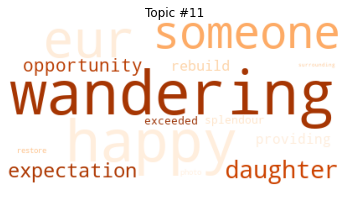

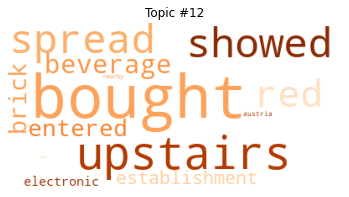

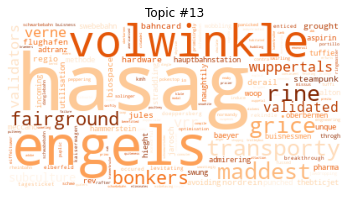

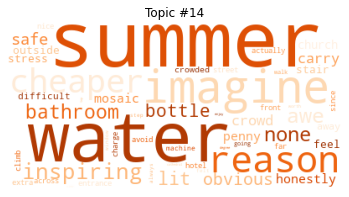

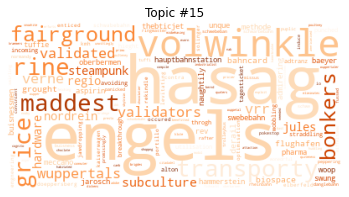

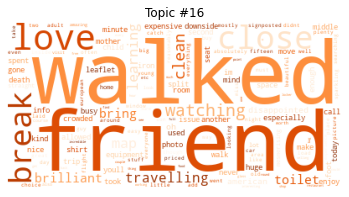

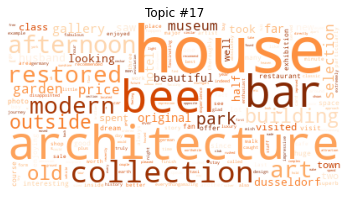

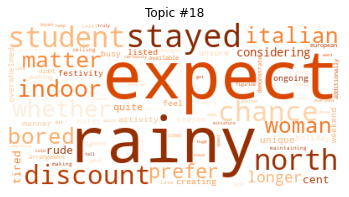

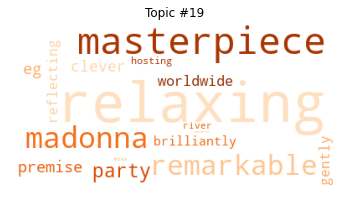

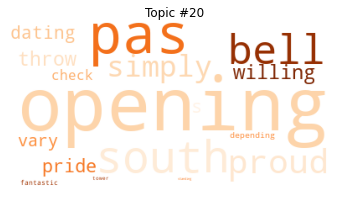

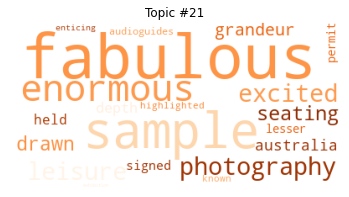

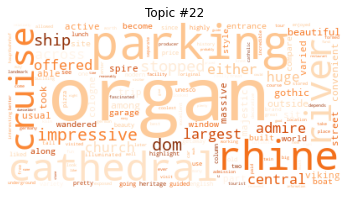

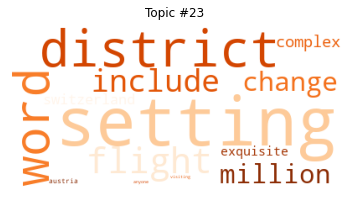

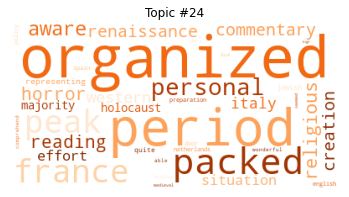

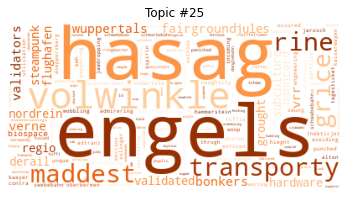

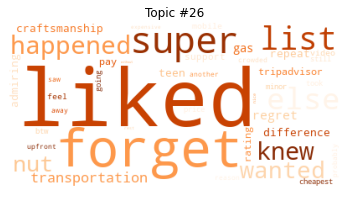

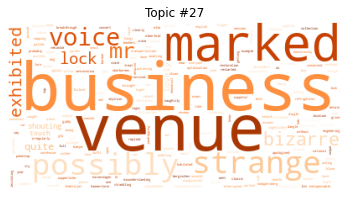

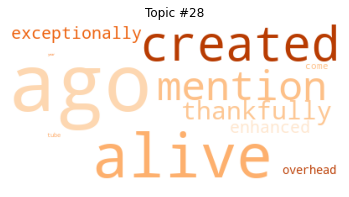

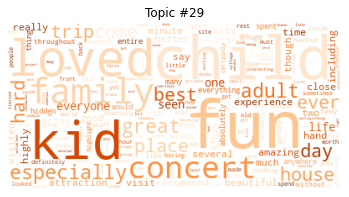

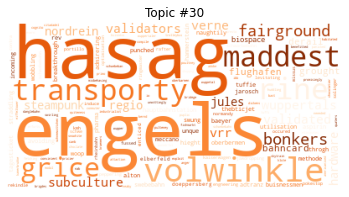

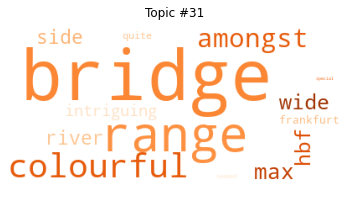

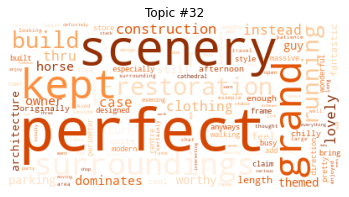

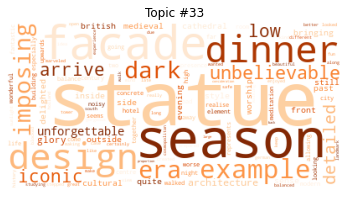

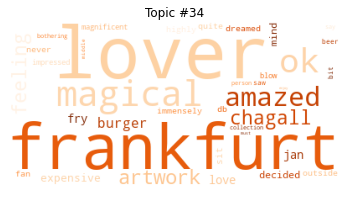

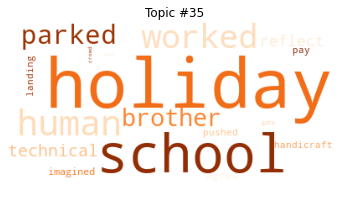

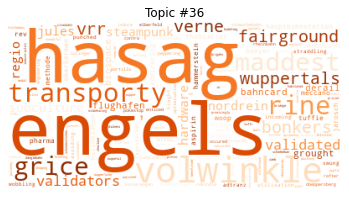

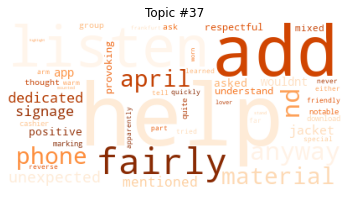

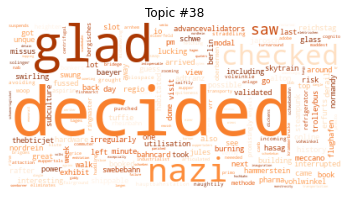

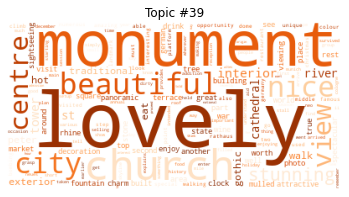

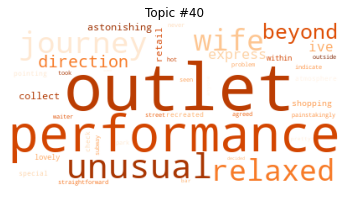

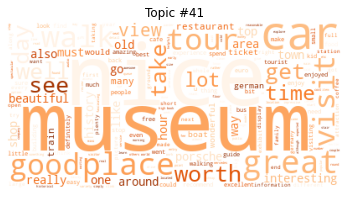

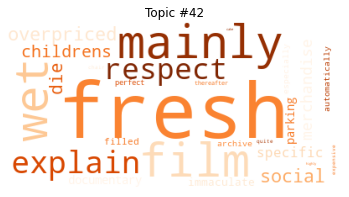

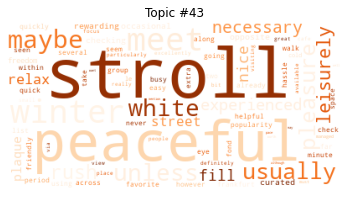

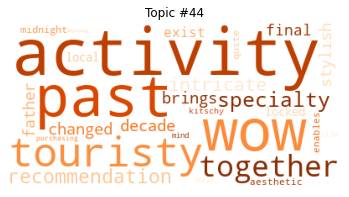

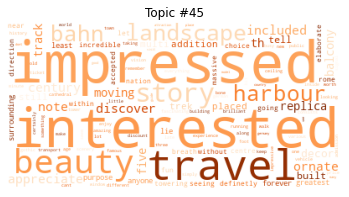

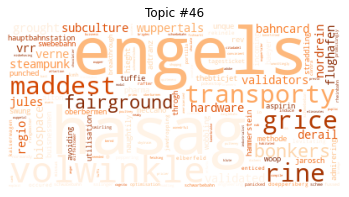

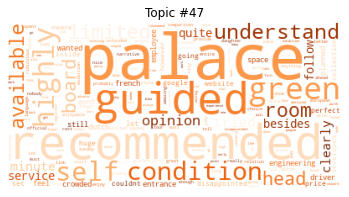

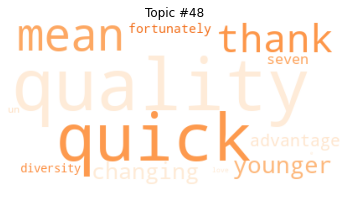

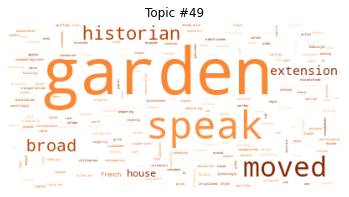

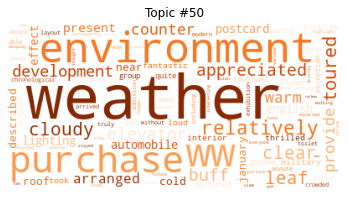

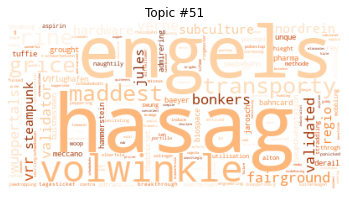

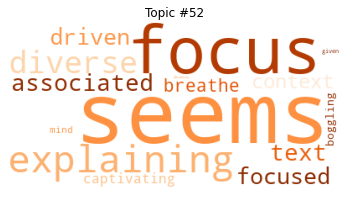

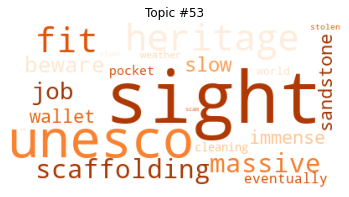

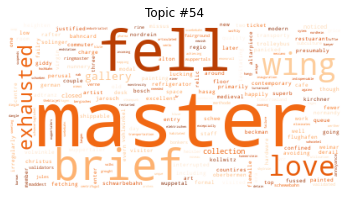

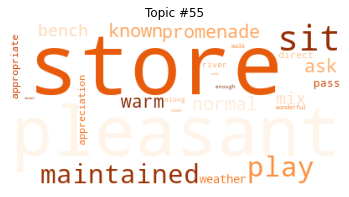

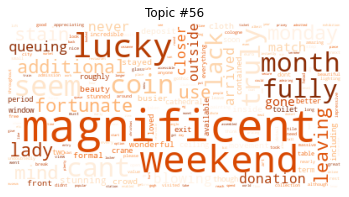

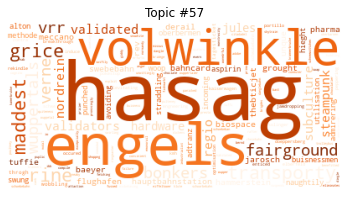

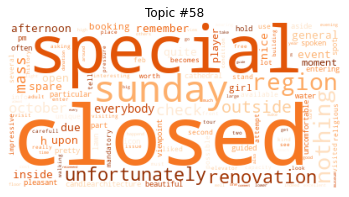

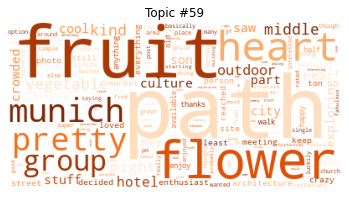

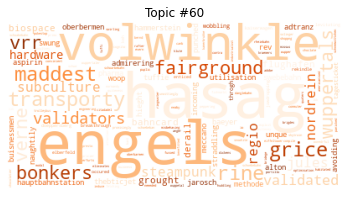

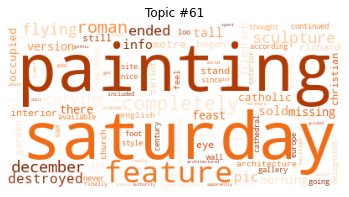

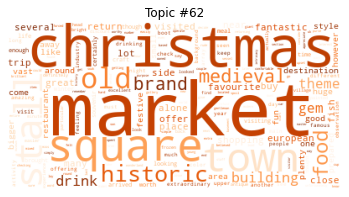

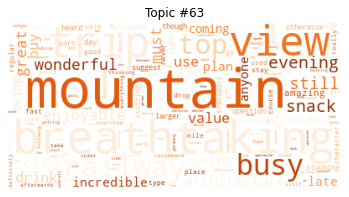

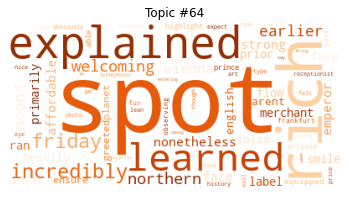

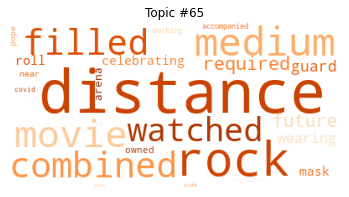

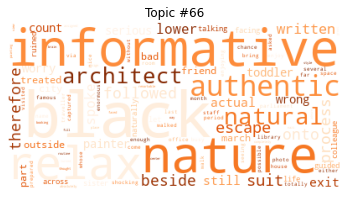

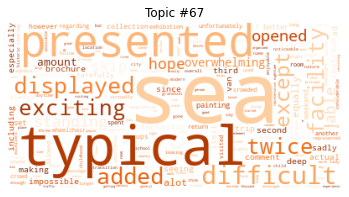

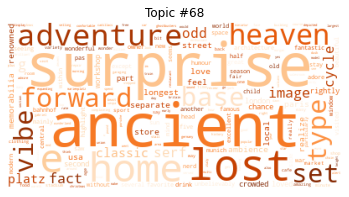

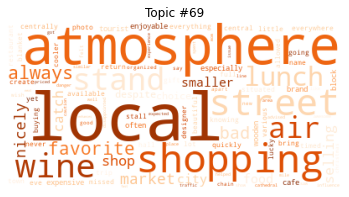

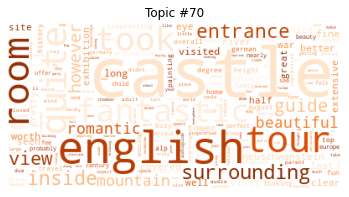

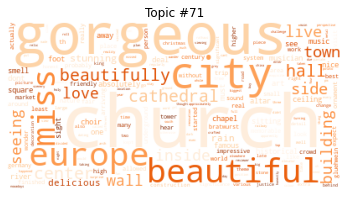

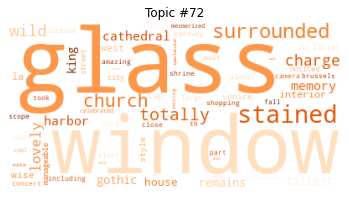

In [90]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for t in range(lda_model_tfidf.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white', colormap='Oranges').fit_words(dict(lda_model_tfidf.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [91]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
cm = CoherenceModel(model=lda_model_tfidf, corpus=bow, dictionary=dictionary ,coherence='u_mass')
coherence = cm.get_coherence()  # get coherence value

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
coherence

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-7.023443719624575

In [100]:
from gensim.test.utils import datapath

lda_model_tfidf.save("Data/Models/Germany/Germany")

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
